In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
# Import Data

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [5]:
train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


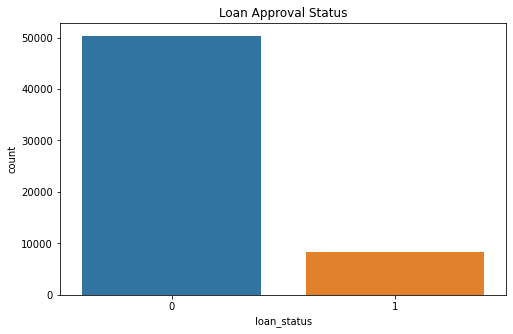

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'loan_status', data=train)
plt.title('Loan Approval Status')
plt.show()

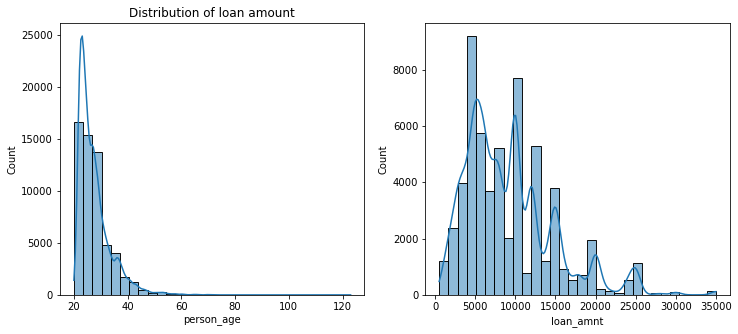

In [7]:
fig, axes = plt.subplots(1,2, figsize = (12,5))
sns.histplot(train['person_age'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of person age')
sns.histplot(train['loan_amnt'], bins=30, kde=True, ax=axes[1])
axes[0].set_title('Distribution of loan amount')
plt.show()

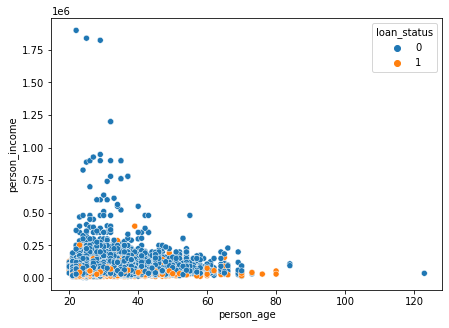

In [8]:
fig = plt.figure(figsize = (7,5))
sns.scatterplot(data=train, x = 'person_age', y ='person_income', hue='loan_status')
plt.show()

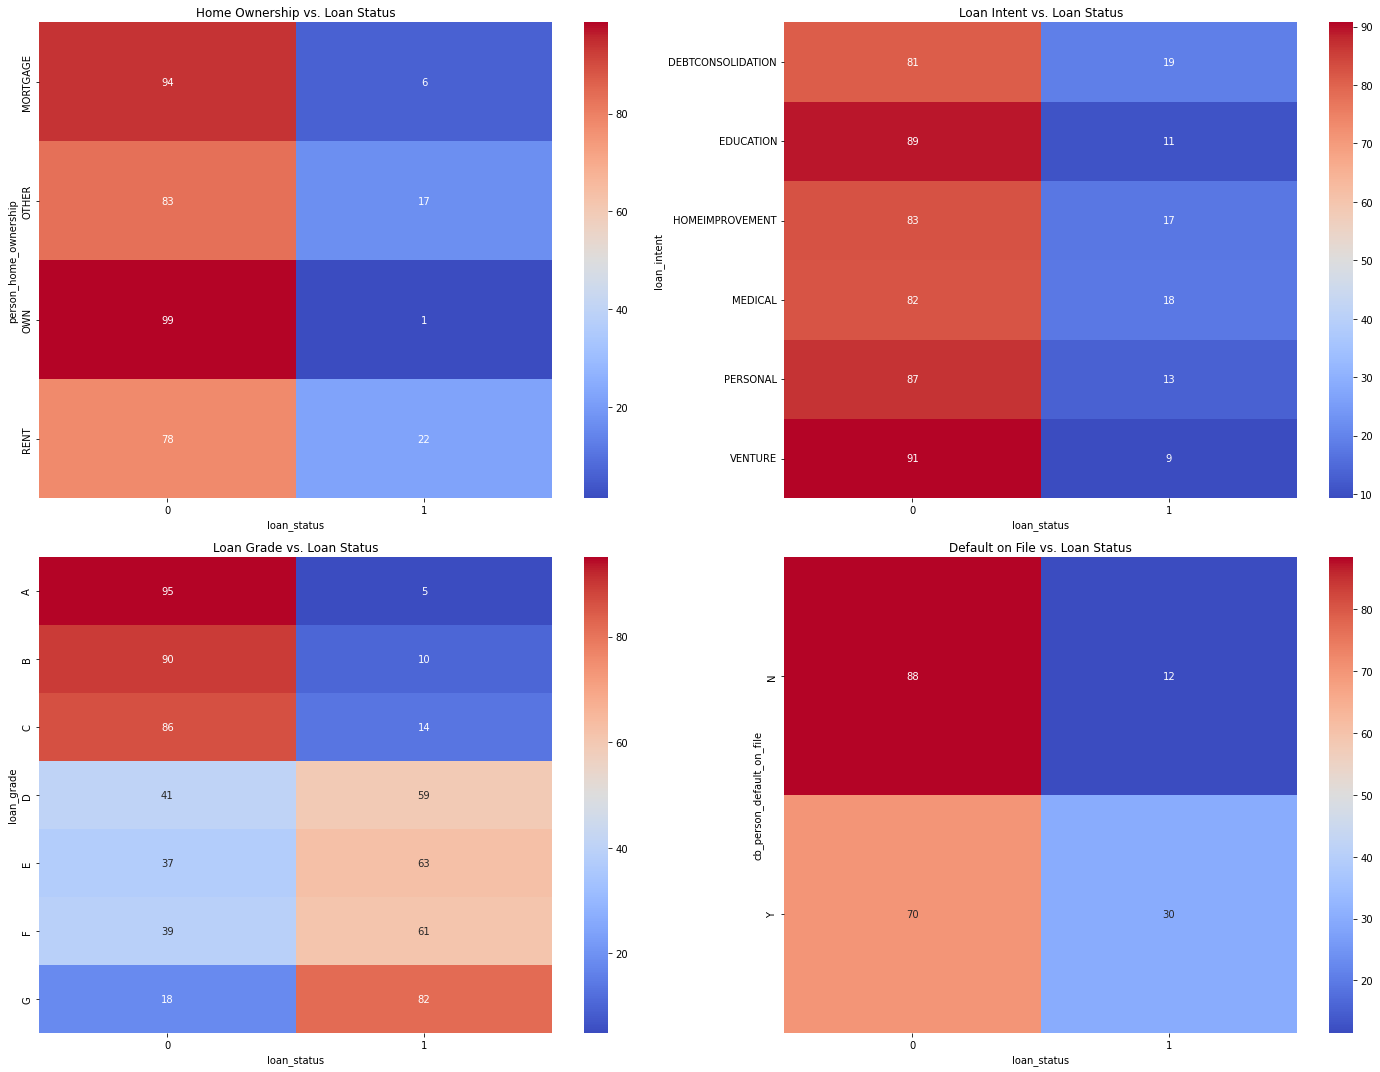

In [9]:
fig, axes = plt.subplots(2,2, figsize = (20,15))


cmap = sns.color_palette("coolwarm", as_cmap=True)

# First heatmap with title
sns.heatmap(data=round(100*pd.crosstab(train['person_home_ownership'], train['loan_status'], normalize=0), 2),
            annot=True, cmap=cmap, fmt='.0f', ax=axes[0, 0])
axes[0, 0].set_title("Home Ownership vs. Loan Status")

# Second heatmap with title
sns.heatmap(data=round(100*pd.crosstab(train['loan_intent'], train['loan_status'], normalize=0), 2),
            annot=True, cmap=cmap, fmt='.0f', ax=axes[0, 1])
axes[0, 1].set_title("Loan Intent vs. Loan Status")

# Third heatmap with title
sns.heatmap(data=round(100*pd.crosstab(train['loan_grade'], train['loan_status'], normalize=0), 2),
            annot=True, cmap=cmap, fmt='.0f', ax=axes[1, 0])
axes[1, 0].set_title("Loan Grade vs. Loan Status")

# Fourth heatmap with title
sns.heatmap(data=round(100*pd.crosstab(train['cb_person_default_on_file'], train['loan_status'], normalize=0), 2),
            annot=True, cmap=cmap, fmt='.0f', ax=axes[1, 1])
axes[1, 1].set_title("Default on File vs. Loan Status")

# Display the plot
plt.tight_layout()
plt.show()


In [10]:
train = pd.get_dummies(train, drop_first = True)
X = train.drop('loan_status', axis=1)
y = train['loan_status']

skf = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

## Random Forest

In [11]:
train = pd.get_dummies(train, drop_first = True)
X = train.drop('loan_status', axis=1)
y = train['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_probs = rf.predict(X_test)

roc_auc = roc_auc_score(y_test, y_probs)
print(f'ROC-AUC score: {roc_auc:.4f}')

ROC-AUC score: 0.8535


In [17]:
test = pd.get_dummies(test, drop_first=True)
y_probs1 = rf.predict(test)
df_sub = pd.DataFrame({'id':test['id'], 'loan_status':y_probs1})
df_sub

,id,loan_status
0,58645,1
1,58646,0
2,58647,1
3,58648,0
4,58649,0
...,...,...
39093,97738,0
39094,97739,0
39095,97740,0
39096,97741,1


In [15]:
df_sub.to_csv('submission.csv', index=False)